In [9]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00


In [10]:
import ipywidgets as widgets
from IPython.display import display


In [11]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

model = joblib.load("/content/drive/MyDrive/ML_Project/risk_model.pkl")
encoder = joblib.load("/content/drive/MyDrive/ML_Project/participation_encoder.pkl")


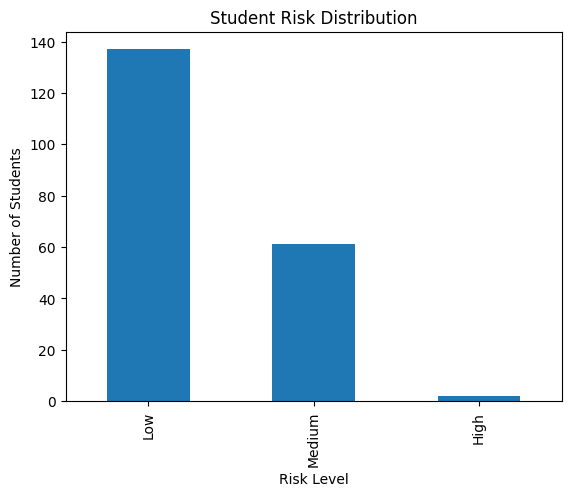

In [12]:
conn = sqlite3.connect("/content/drive/MyDrive/ML_Project/university.db")
df = pd.read_sql("SELECT * FROM students", conn)

df["risk_level"].value_counts().plot(kind='bar')

plt.title("Student Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Students")

plt.show()


In [14]:
attendance = widgets.IntSlider(min=0, max=100, value=70, description='Attendance')
internal = widgets.IntSlider(min=0, max=100, value=65, description='Internal')
assignment = widgets.IntSlider(min=0, max=100, value=75, description='Assignment')
study_hours = widgets.IntSlider(min=0, max=40, value=10, description='Study Hours')
gpa = widgets.FloatSlider(min=0, max=10, value=6.5, description='GPA')

participation = widgets.Dropdown(
    options=['Low', 'Medium', 'High'],
    value='Medium',
    description='Participation'
)

missed = widgets.IntSlider(min=0, max=10, value=2, description='Missed')

button = widgets.Button(description="Predict Risk")

output = widgets.Output()

display(attendance, internal, assignment, study_hours, gpa,
        participation, missed, button, output)


IntSlider(value=70, description='Attendance')

IntSlider(value=65, description='Internal')

IntSlider(value=75, description='Assignment')

IntSlider(value=10, description='Study Hours', max=40)

FloatSlider(value=6.5, description='GPA', max=10.0)

Dropdown(description='Participation', index=1, options=('Low', 'Medium', 'High'), value='Medium')

IntSlider(value=2, description='Missed', max=10)

Button(description='Predict Risk', style=ButtonStyle())

Output()

In [15]:
def predict(b):
    with output:
        output.clear_output()

        input_data = pd.DataFrame([{
            "attendance": attendance.value,
            "internal_score": internal.value,
            "assignment_completion": assignment.value,
            "study_hours": study_hours.value,
            "previous_gpa": gpa.value,
            "participation": participation.value,
            "missed_submissions": missed.value
        }])

        input_data["participation"] = encoder.transform(
            input_data["participation"]
        )

        prediction = model.predict(input_data)[0]
        probability = model.predict_proba(input_data).max()

        risk_map = {
            0:"High Risk",
            1:"Low Risk",
            2:"Medium Risk"
        }

        print("Predicted Risk Level:", risk_map[prediction])
        print(f"Confidence: {probability*100:.2f}%")

button.on_click(predict)
